# Logistic Regression

Logistic regression is like linear regression, but for classification problems. It still produces a line, but the line is used to separate data between two categories of some sort, which requires a slightly different approach internally. 

To ilustrate logistics regression in a relevante example, let´s fabricate some data that ilustrates tqo categories of vehicle speeds: "slow" and "fast". And, we will plot eaach point against two axes, one representing the distance to an upcoming bump in the road, and the other the size of the bump. In theory, cars should slow down when approaching a large bump, and slow down more the closer you get to it. The behavior could perhabs be learned from data from real drivers approaching real bumps. 

We don´t have a real dataset for this, but we can fabricate one. We will use scikt-learn´s "make_blobs" function to create a couple of clusters of each category ("fast" and "slow") near the corner of our graph

In [17]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
from sklearn.datasets import make_blobs

n_samples = 10000

# To generate our fabricated data set, we will create two blobs of randomly distributed data at two corners of the graph.
centers = [(0.9, 0.05), (0.05, 0.94)] # Data center between those two points
X, y = make_blobs(n_samples = n_samples, n_features = 2, cluster_std =0.4, centers=centers, shuffle=False, random_state=42) # Two different clusters

# Then filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(X,y):
    if(feature [0] >= 0 and feature[0] <= 1.0 and feature [1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# And convert the results back into numpy arrays:
X = np.array(features)
y = np.array(labels)



C:\Users\jneto\AppData\Local\Temp\ipykernel_10252\3973893573.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(this_X[:,0], this_X[:, 1], c=color, alpha =0.5, edgecolor='k', label=class_names[this_y])


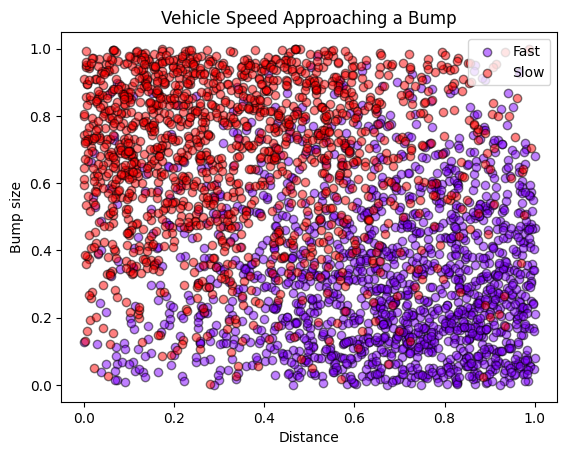

In [18]:
# lets visualize our fabricated data set

plt.figure()
y_unique = np.unique(y)
class_names = ['Fast', 'Slow']
colors = cm.rainbow(np.linspace(0.0,1.0, y_unique.size))

for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:,0], this_X[:, 1], c=color, alpha =0.5, edgecolor='k', label=class_names[this_y])
    
plt.legend(loc="best")
plt.xlabel('Distance')
plt.ylabel('Bump size')
plt.title("Vehicle Speed Approaching a Bump")
plt.show()




Creating a ligistic regression model in scikit-learn is easy. There are several hyperparameters you can set on it, but most often the regularization term "C" is what people tinker with. It is default is 1.0, which we will leave as-is for this example.

After creating the classification model, we will fit it to out data, which causes the model to learn the correct line for splitting the data as training data is fed into it. 

In [26]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1.0)


logreg.fit(X, y)

LogisticRegression()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

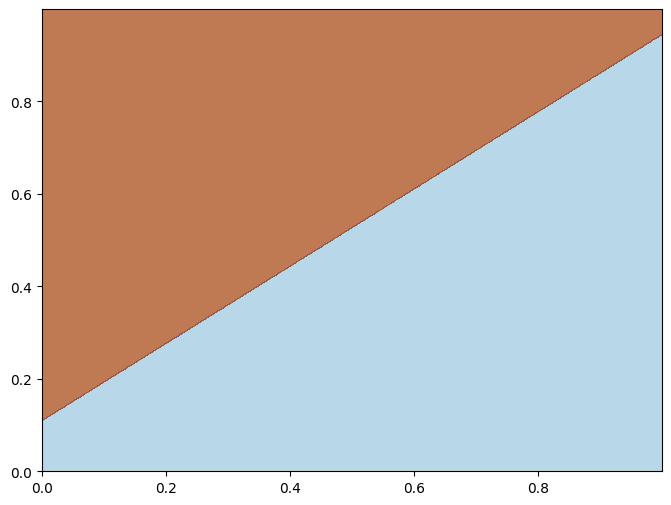

In [24]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001), np.arange(0, 1.0, 0.001))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha =0.8)
    plt.scatter(X[:,0], X[:,1], C =y.astype(np.float))
    plt.xlabel('Distance')
    plt.ylabel('Bumbp size')
    plt.title("Vehicle speed approaching a bump")
    plt.show()

plotPredictions(logreg)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.840983606557377